In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data= pd.read_csv("clients.csv")
data

,ID Client,Age,Annual Income,Purchase Score
0,1,56,33,4
1,2,69,74,9
2,3,46,27,79
3,4,32,53,62
4,5,60,85,24
...,...,...,...,...
9995,9996,55,109,75
9996,9997,51,56,11
9997,9998,57,14,11
9998,9999,64,71,72


In [4]:
data.head()

,ID Client,Age,Annual Income,Purchase Score
0,1,56,33,4
1,2,69,74,9
2,3,46,27,79
3,4,32,53,62
4,5,60,85,24


In [5]:
from sklearn.cluster import KMeans 
X=data[["Age","Annual Income","Purchase Score"]].values
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
#Ajouter les groupes sur le dataset
data['Cluster'] = y_kmeans
data


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,ID Client,Age,Annual Income,Purchase Score,Cluster
0,1,56,33,4,3
1,2,69,74,9,0
2,3,46,27,79,1
3,4,32,53,62,1
4,5,60,85,24,0
...,...,...,...,...,...
9995,9996,55,109,75,2
9996,9997,51,56,11,3
9997,9998,57,14,11,3
9998,9999,64,71,72,1


In [6]:
data.groupby('Cluster')[['Age','Annual Income','Purchase Score']].mean()

,Age,Annual Income,Purchase Score
Cluster,,,
0,43.520000,79.941266,28.893671
1,42.881993,43.020542,77.531031
2,43.665167,112.586409,77.775878
3,44.196067,32.327935,25.321573
4,43.610862,128.212766,27.051512


In [7]:
#écart-type
data.groupby('Cluster')[['Age','Annual Income','Purchase Score']].std()

,Age,Annual Income,Purchase Score
Cluster,,,
0,14.837740,13.012448,16.962646
1,14.895440,19.050849,13.799644
2,14.990480,19.695394,13.535858
3,14.944777,13.484882,15.432972
4,14.866626,12.847678,16.373122


In [8]:
#min
data.groupby('Cluster')[['Age','Annual Income','Purchase Score']].min()

,Age,Annual Income,Purchase Score
Cluster,,,
0,18,55,0
1,18,10,48
2,18,78,48
3,18,10,0
4,18,104,0


In [9]:
#max
data.groupby('Cluster')[['Age','Annual Income','Purchase Score']].max()

,Age,Annual Income,Purchase Score
Cluster,,,
0,69,104,65
1,69,78,100
2,69,149,100
3,69,58,57
4,69,149,61


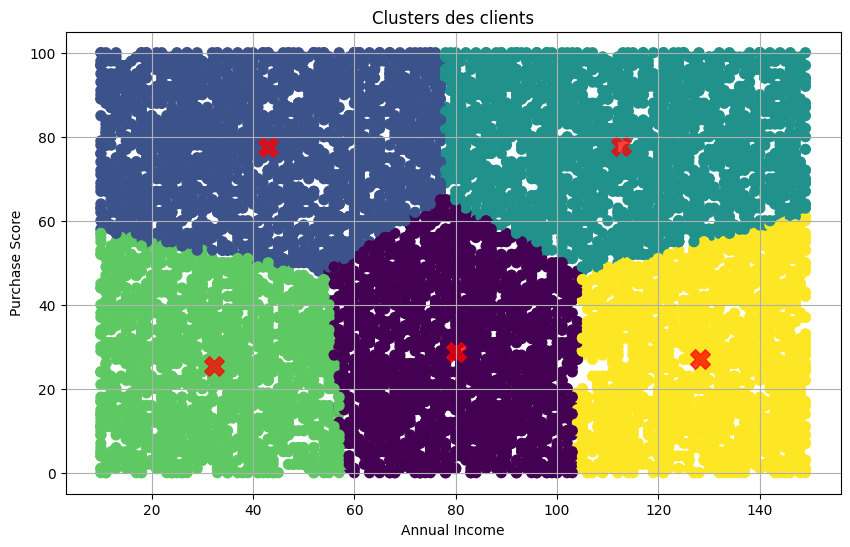

In [11]:
##Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income'], data['Purchase Score'], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters des clients')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Score')
plt.grid()
plt.show()


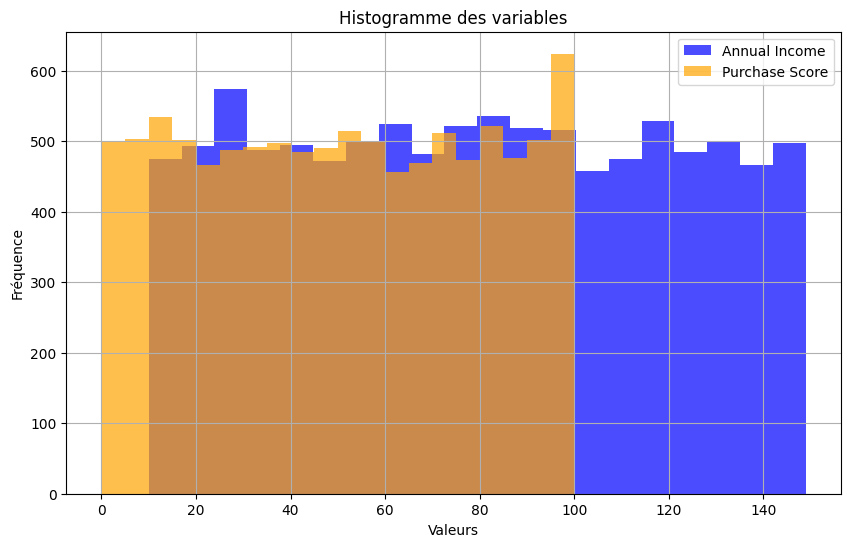

In [12]:
#Visualisation sur histogramme
plt.figure(figsize=(10, 6))
plt.hist(data['Annual Income'], bins=20, color='blue', alpha=0.7, label='Annual Income')
plt.hist(data['Purchase Score'], bins=20, color='orange', alpha=0.7, label='Purchase Score')
plt.title('Histogramme des variables')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.legend()
plt.grid()
plt.show()

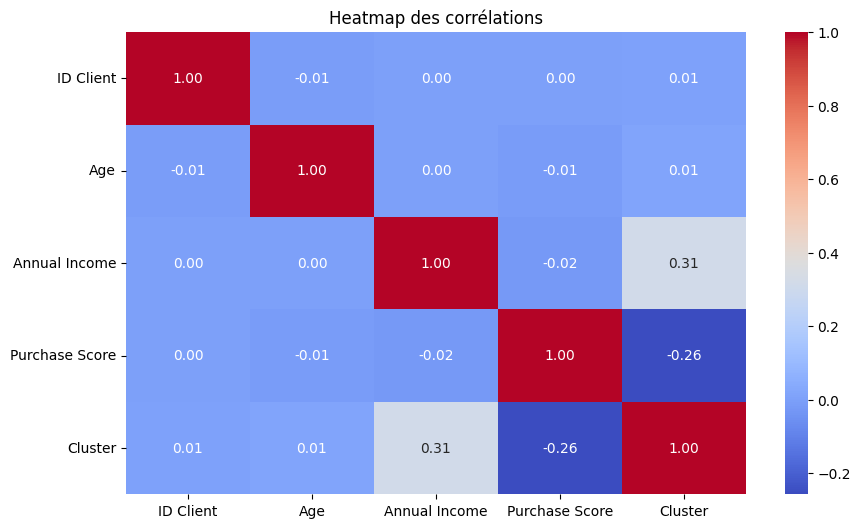

In [ ]:
#Visualisation sur heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()



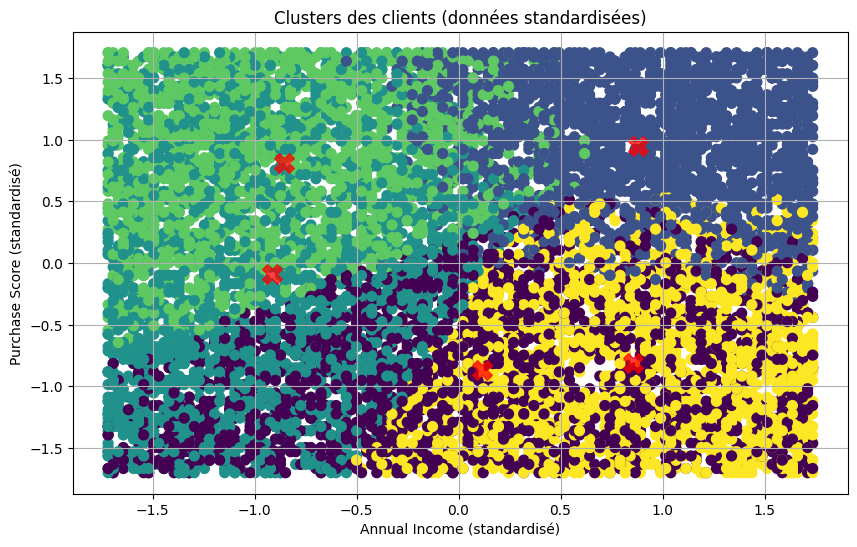

In [ ]:
#Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Appliquer KMeans sur les données standardisées
kmeans_scaled = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)
#Ajouter les groupes sur le dataset
data['Cluster_scaled'] = y_kmeans_scaled
#Visualisation des clusters sur les données standardisées
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=data['Cluster_scaled'], cmap='viridis', s=50)
plt.scatter(kmeans_scaled.cluster_centers_[:, 1], kmeans_scaled.cluster_centers_[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters des clients (données standardisées)')
plt.xlabel('Annual Income (standardisé)')
plt.ylabel('Purchase Score (standardisé)')
plt.grid()
plt.show()

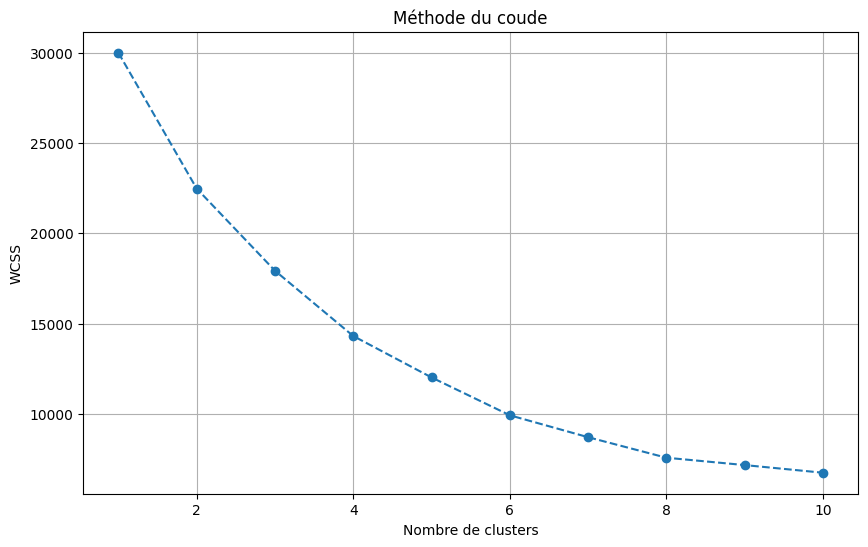

In [ ]:
#Determiner le nombre optimal de clusters (méthode du coude)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
#plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


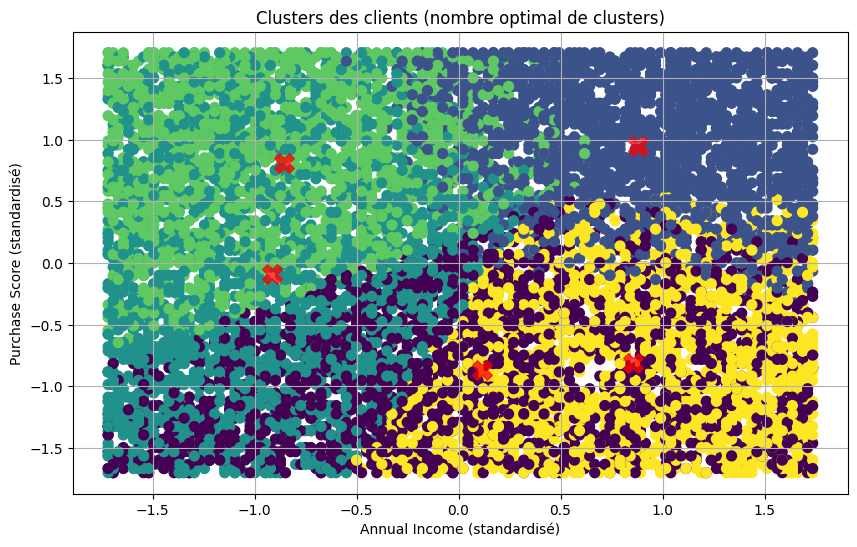

In [ ]:
#Construction du model KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_optimal = kmeans_optimal.fit_predict(X_scaled)
#Ajouter les groupes sur le dataset
data['Cluster_optimal'] = y_kmeans_optimal
#Visualisation des clusters avec le nombre optimal de clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=data['Cluster_optimal'], cmap='viridis', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters des clients (nombre optimal de clusters)')
plt.xlabel('Annual Income (standardisé)')
plt.ylabel('Purchase Score (standardisé)')
plt.grid()
plt.show()

In [ ]:
#Enrzgistrer le modèle entainé sous forme de fichier joblib
import joblib
joblib.dump(kmeans_optimal, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [ ]:
#description des clusters
#Ajouter les types de clients
types = {
    0: 'Jeunes à fort achat',
    1: 'Seniors riches',
    2: 'Clients moyens',
    3: 'Jeunes peu engagés',
    4: 'Gros consommateurs'
}
data['TypeClient'] = data['Cluster'].map(types)
data

,ID Client,Age,Annual Income,Purchase Score,Cluster,TypeClient,Cluster_scaled,Cluster_optimal
0,1,56,33,4,3,Jeunes peu engagés,2,2
1,2,69,74,9,0,Jeunes à fort achat,4,4
2,3,46,27,79,1,Seniors riches,3,3
3,4,32,53,62,1,Seniors riches,3,3
4,5,60,85,24,0,Jeunes à fort achat,4,4
...,...,...,...,...,...,...,...,...
9995,9996,55,109,75,2,Clients moyens,1,1
9996,9997,51,56,11,3,Jeunes peu engagés,2,2
9997,9998,57,14,11,3,Jeunes peu engagés,2,2
9998,9999,64,71,72,1,Seniors riches,2,2


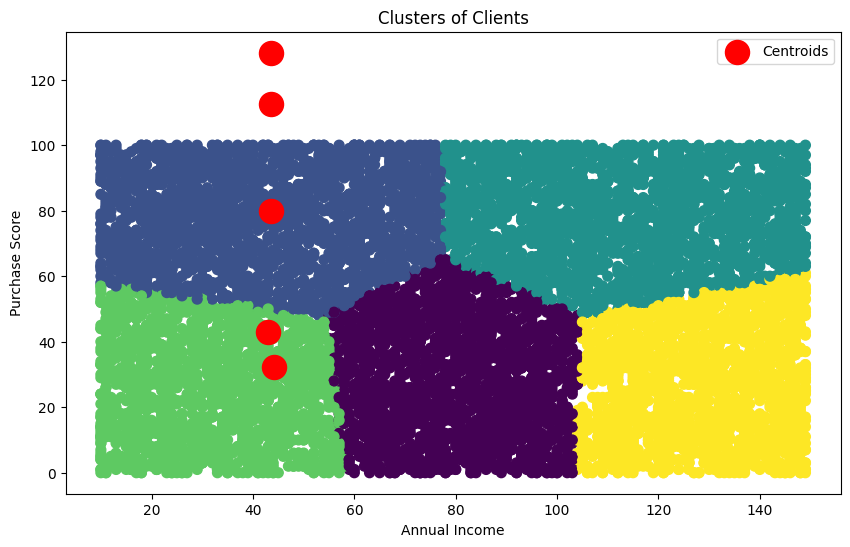

In [ ]:
data.groupby('Cluster')[['Age','Annual Income','Purchase Score']].mean()
#Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income'], data['Purchase Score'], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Score')
plt.legend()
plt.show()
#Visua